# This is an Advertising dataset 
### We need to predict the sales of the company depending upon the investments made on the various products given as:-
- Televison
- Radio 
- Newspaper



In [1]:
#importing all the required libraies and functions
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split 
from sklearn import metrics

/home/netzwelt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#reading the cdv file, index_col marks the zeoth column as the index
add = pd.read_csv('Advertising.csv', index_col=0)
add.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### As the sales have a contiuous value then this is a regression problem and we'll try out the Linear Regression technique on the dataset with different features set

In [3]:
add.shape

(200, 4)

In [4]:
add.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

### Using seaborn pair plot to analyse relationship between the sales and other features individually

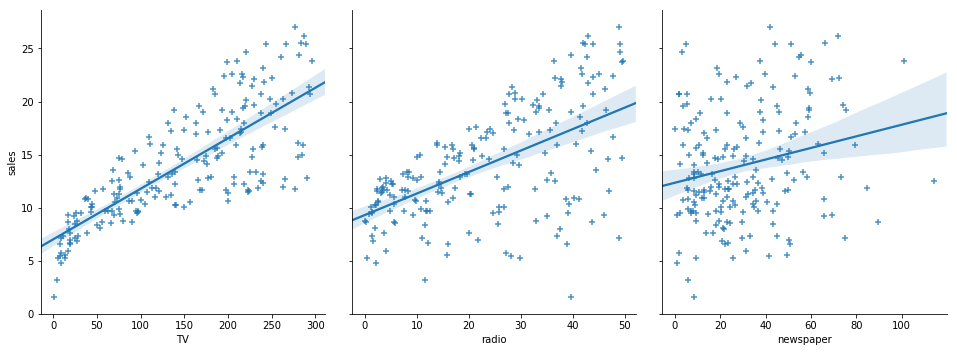

In [5]:
sns.pairplot(add, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size =5, aspect=.9, kind='reg', markers="+")

- Sales and TV are have an approximate linear relationship as the regression line is a good fit to the data
- Sales and Radio also provide a significant realtionship and the fit is slightly linear 
- However Newspaper does not get a good fit with the model as the dataset looked more sparsed rather than following the line

In [6]:
X = add[['TV', 'radio', 'newspaper']]
y = add['sales']

In [7]:
X.shape

(200, 3)

In [8]:
y.shape

(200,)

### We'll use the train test split to divide the dataset

In [21]:
#test size and random state parameters determine the dividing fraction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


### Applying Linear Regression algorithm

In [23]:
Lreg = LinearRegression()
Lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_pred = Lreg.predict(X_test)

- Now We have the predictions on the testing set
- and are stored in y_pred

### We'll look at the model coefficients and try to interpret these values for our                                                                    hypothesis

In [25]:
#this is the intercept value(B zero)
Lreg.intercept_

3.054452011581386

In [26]:
#this are the parameters(B1, B2, B3)
Lreg.coef_

array([0.04735257, 0.17323832, 0.00466519])

In [27]:
#mapping the coefficients to the particular feature
list(zip(['Tv', 'radio', 'Newspaper'], Lreg.coef_))

[('Tv', 0.04735257168501801),
 ('radio', 0.17323832458475985),
 ('Newspaper', 0.0046651872005193384)]

$$y = 3.05 + 0.0447 \times TV + 0.173 \times Radio + 0.0046 \times Newspaper$$


How do we interpret the TV coefficient (0.0473)?

- For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0473 "unit" increase in Sales.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional 1,000 dollar spent on TV ads is  associated with an increase in sales of 44.7 items.


### We'll need an evaluation metric to evaluate our model accuracy
- so for now we'll consider the root mean square method

In [28]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

2.1220570079632934

- Now also let's see the accuracy score of our model

In [29]:
Lreg.score(X_test, y_test)

0.7575894500772719

### Performing Feature Selection
- We have seen in the pair plot that the newspaper feature doesn't provide a good linear relationship with sales.
- Hence now we check out our model performance excluding Newspaper

In [30]:
#Newspaper excluded
cols = ['TV', 'radio']

X_ = add[cols]

y_ = add.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=3)

#making a linear model
lreg = LinearRegression()

# fit the model to the training data
lreg.fit(X_train, y_train)

# making predictions on the testing set
y_pred = lreg.predict(X_test)

- Now we compute the root mean squared error for this model

In [31]:
(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4640037142541635

- It is seen that the RMSE is less which provides us a very good reason to drop Newspaper from the feature set
- As RMSE is decreases to the significant amount it is a better model than the previous one

In [20]:
lreg.score(X_test, y_test)

0.914256556902537

### Our accuracy score has increased , thus we interpret that investing more into Tv and Radio comodities will increase the sales rather than doing any investment on the Newspaper